# Question 2

In [1]:
pip install gymnasium


[notice] A new release of pip is available: 23.1.2 -> 24.0


[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import gymnasium
from gymnasium import spaces
import numpy as np
import matplotlib.pyplot as plt
import os
import math
from operator import add

In [ ]:
# np.random.seed(123)

# Creating the Random Walk Experiment environment encapsulating the Gymnasium.Env class

In [3]:
# creating the Random Walk Environment (RWE)
class RandomWalkExperiment(gymnasium.Env):

  metadata = {"render_modes" : ["human", "rgb_array"], "render_fps": 4}

  def __init__(self, render_mode = None, slip_prob = 0.5, seed = None):

    self.size = 7
    self.window_size = 512
    self.observation_space = spaces.Discrete(7) # 5 non-terminal and 2 terminal states
    self.action_space = spaces.Discrete(2) # left and right
    # defining the transition probs
    self.transition = {
        0 : {
            0 : [(1.0, 0, 0, True)],
            1 : [(1.0, 0, 0, True)]
        },
        1 : {
            0 : [(0.5, 0, 0, True), (0.5, 2, 0, False)],
            1 : [(0.5, 2, 0, False), (0.5, 0, 0, True)]
        },
        2 : {
            0 : [(0.5, 1, 0, False), (0.5, 3, 0, False)],
            1 : [(0.5, 1, 0, False), (0.5, 3, 0, False)]
        },
        3 : {
            0 : [(0.5, 2, 0, False), (0.5, 4, 0, False)],
            1 : [(0.5, 2, 0, False), (0.5, 4, 0, False)]
        },
        4 : {
            0 : [(0.5, 3, 0, False), (0.5, 5, 0, False)],
            1 : [(0.5, 3, 0, False), (0.5, 5, 0, False)]
        },
        5 : {
            0 : [(0.5, 4, 0, False), (0.5, 6, 1, True)],
            1 : [(0.5, 6, 1, True), (0.5, 4, 0, False)]
        },
        6 : {
            0 : [(1.0, 6, 1, True)],
            1 : [(1.0, 6, 1, True)]
        },
    }
    self.window = None
    self.clock = None
    self.slip_prob = slip_prob
    self.seed(seed)  # Set the seed

  def seed(self, seed=None):
      self.np_random, seed = gymnasium.utils.seeding.np_random(seed)
      return [seed]

  def reset(self, seed = None):
    self.seed(seed)
    # Starting the random walk from the middle
    self.state = (self.size + 1)//2
    return self.state

  def step(self, action):

    if self.np_random.random() < self.slip_prob:
      action = 1 if action == 0 else 0

    transitions = self.transition[self.state][action]
    tprobs, next_states, rewards, terminate = zip(*transitions)
    next_state_index = self.np_random.choice(range(len(next_states)), p = tprobs)
    next_state = next_states[next_state_index]
    reward = rewards[next_state_index]
    done = terminate[next_state_index]

    # moving to the next state
    self.state = next_state
    return next_state, reward, done, {}

# Part 1: Implementing the `generateTrajectory()` function with `env`, `policy` and `maxSteps` and `seed` as input

In [4]:
# Implementing the generateTrajectory function with maxsteps
def generateTrajectory(env, policy, maxSteps, seed = None):
  state = env.reset(seed = seed)
  trajectory = []
  for _ in range(maxSteps):
    # choosing an action from policy
    action = policy[state] # pi(a|s)
    next_state, reward, done, _ = env.step(action)
    trajectory.append((state, action, reward, next_state, done))
    if done:
      break
    state = next_state

  if done:
    return trajectory
  else:
    return [] # discard partial trajectories


In [6]:
maxSteps = 100
seed = 123
env = RandomWalkExperiment(seed = seed)
policy = [0] * env.observation_space.n # according to the question, the policy is "Always go left -> 0"
trajectory = generateTrajectory(env, policy, maxSteps, seed = seed)
print("Printing Trjactory")
print(trajectory)
print("Total number of states encountered : {}".format(len(trajectory)))

Printing Trjactory
[(4, 0, 0, 3, False), (3, 0, 0, 2, False), (2, 0, 0, 3, False), (3, 0, 0, 2, False), (2, 0, 0, 3, False), (3, 0, 0, 2, False), (2, 0, 0, 1, False), (1, 0, 0, 2, False), (2, 0, 0, 1, False), (1, 0, 0, 2, False), (2, 0, 0, 1, False), (1, 0, 0, 0, True)]
Total number of states encountered : 12


# Part 2: Implementing the `decayAlpha()` for **linear** and **exponential** decay of step parameter given `initialValue`, `finalValue` and `maxSteps`

In [7]:
# Implementing a function for deacaying the step parameter
def decayAlpha(initialValue, finalValue, maxSteps, decayType):

  # stpring the step params in a list
  alphas = []

  if decayType == "linear":
   decay_rate = (finalValue - initialValue) / maxSteps
   for curr_step in range(maxSteps):
    curr_alpha = initialValue + decay_rate * curr_step
    alphas.append(curr_alpha)

  elif decayType == "exponential":
    decay_rate = (np.log(finalValue/initialValue)) / maxSteps
    for curr_step in range(maxSteps):
      curr_alpha = initialValue * np.exp(decay_rate * curr_step)
      alphas.append(curr_alpha)

  return alphas

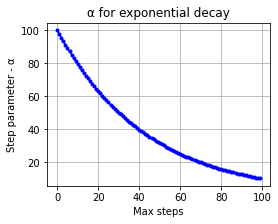

In [8]:
decayType = "exponential"
maxSteps = 100
alphas = decayAlpha(100, 10, maxSteps, decayType)

# plotting the alphas
plt.figure(figsize = (4, 3))
plt.plot(range(maxSteps), alphas, color = "blue", marker = ".")
plt.ylabel("Step parameter - α")
plt.xlabel("Max steps")
plt.title("α for {} decay".format(decayType))
plt.grid(True)
plt.show()

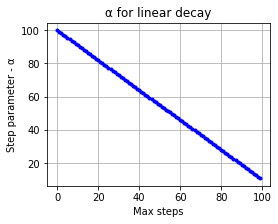

In [9]:
decayType = "linear"
maxSteps = 100
alphas = decayAlpha(100, 10, maxSteps, decayType)

# plotting the alphas
plt.figure(figsize = (4, 3))
plt.plot(range(maxSteps), alphas, color = "blue", marker = ".")
plt.ylabel("Step parameter - α")
plt.xlabel("Max steps")
plt.title("α for {} decay".format(decayType))
plt.grid(True)
plt.show()

# Part 3: Implementing the Monte Carlo algorithm

In [10]:
# Implementing the monte carlo prediction algorithm for RWE environment
def MonteCarloPrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, mctype, global_seed):
    values = np.zeros(env.observation_space.n)
    values_eps = []
    alphas = decayAlpha(initialValue, finalValue, numEpisodes, decayType)

    # Iterating over the episodes
    for episode in range(numEpisodes):
        episode_seed = global_seed + episode
        trajectory = generateTrajectory(env, policy, maxSteps, seed=episode_seed)
        if not trajectory:
            continue
        G = 0
        visited_states = set()

        for traj_idx in range(len(trajectory) - 1, -1, -1): # iterating the trajectory in reverse order
            state, action, reward, next_state, done = trajectory[traj_idx]
            G = gamma * G + reward # return calculation
            if mctype == "FVMC" and state not in visited_states:
                values[state] += alphas[episode] * (G - values[state])
                visited_states.add(state)
            elif mctype == "EVMC":
                values[state] += alphas[episode] * (G - values[state])
                if mctype == "FVMC":
                    visited_states.add(state)  # avoid traversing to the next again

        values_eps.append(np.copy(values))

    return values_eps


In [11]:
gamma = 0.99
numEpisodes = 500
mctype = "EVMC"
initialValue = 0.1
finalValue = 0.01
decayType = "exponential"
global_seed = 123

values = MonteCarloPrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, mctype, global_seed)
print(values[numEpisodes -1])

[0.         0.11846299 0.24342452 0.36862828 0.57094041 0.86452903
 0.        ]


# Part 4: Implementing the Temporal Difference method

In [12]:
# Implementing the Temporal Difference learning approach
def TemporalDifferencePrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, global_seed):
    # Initialize the values with zeros
    values = np.zeros(env.observation_space.n)
    alphas = decayAlpha(initialValue, finalValue, numEpisodes, decayType)
    values_eps = []

    for episode in range(numEpisodes):
        episode_seed = global_seed + episode
        # Resetting the environment with a new seed for each episode
        state = env.reset(seed=episode_seed)
        for step in range(maxSteps):
            # Choosing an action from the policy
            action = policy[state]
            next_state, reward, done, _ = env.step(action)
            if not done:
              td_target = reward + gamma * values[next_state]
            else:
              td_target = reward
            td_error = td_target - values[state]
            values[state] += alphas[episode] * td_error
            if done:
                break
            state = next_state

        values_eps.append(np.copy(values))

    return values_eps

In [13]:
gamma = 0.99
numEpisodes = 500
initialValue = 0.1
finalValue = 0.01
decayType = "exponential"
global_seed = 123

values = TemporalDifferencePrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, global_seed)
print(values[numEpisodes - 1])

[0.         0.1330944  0.26925221 0.42220976 0.6033691  0.82355303
 0.        ]


# Part 5: Constant Alpha FVMC

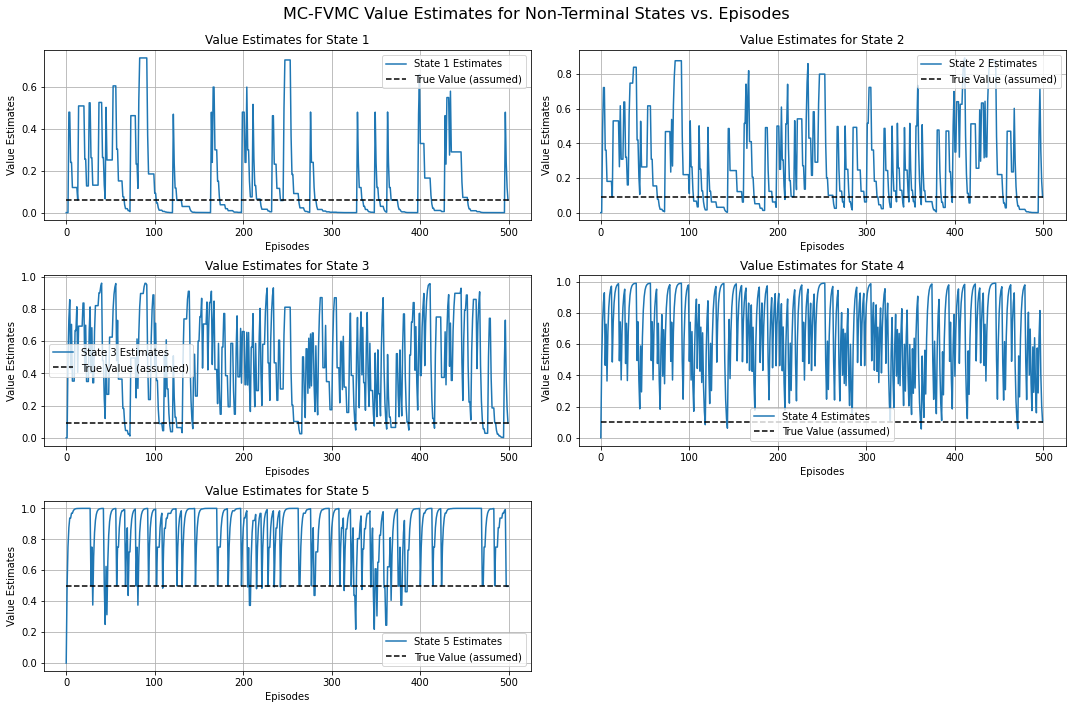

In [14]:
numEpisodes = 500
# part with constant alpha
initialValue = 0.5
finalValue = 0.5
maxSteps = 100
gamma = 0.99
decayType = "linear"
mctype = "FVMC"
global_seed = 123

state_values = MonteCarloPrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, mctype, global_seed)


plt.figure(figsize=(15, 10))

for state in range(1, 6):  # Loop through non-terminal states
    plt.subplot(3, 2, state)
    values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]
    plt.plot(values_per_state, label=f'State {state} Estimates')
    plt.plot([0, numEpisodes], [state_values[numEpisodes - 1][state], state_values[numEpisodes - 1][state]], 'k--', label="True Value (assumed)")
    plt.xlabel('Episodes')
    plt.ylabel('Value Estimates')
    plt.title(f'Value Estimates for State {state}')
    plt.legend()
    plt.grid()
    plt.tight_layout()

plt.suptitle('MC-FVMC Value Estimates for Non-Terminal States vs. Episodes', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()


# Decaying Alpha FVMC

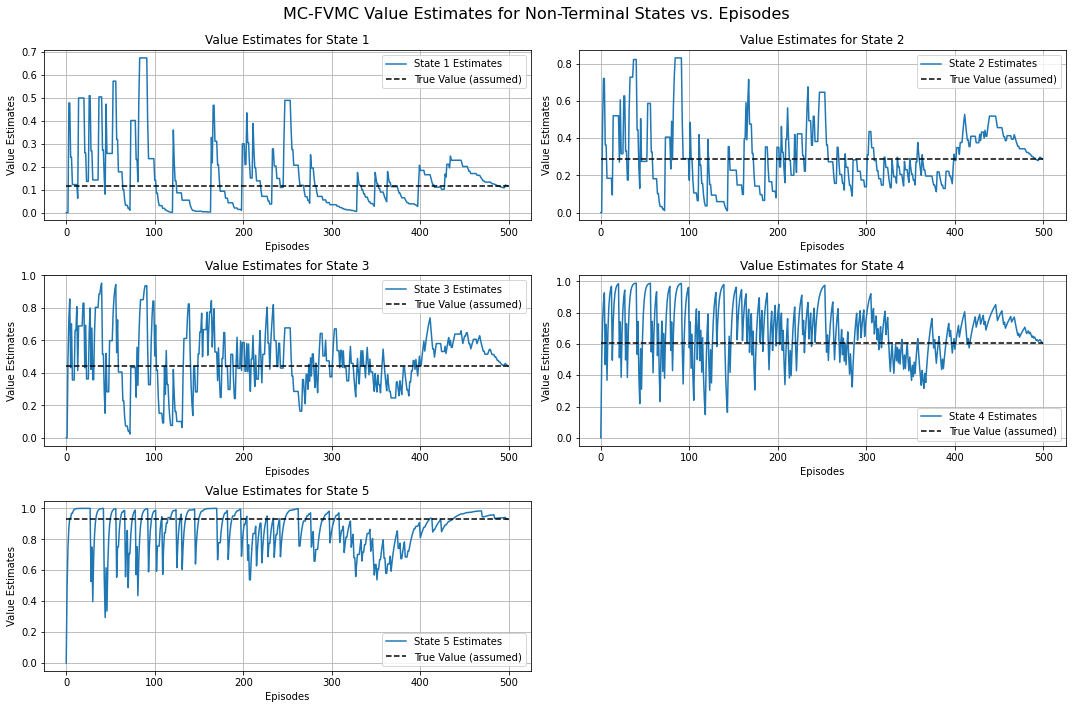

In [15]:
# part with decaying alpha
numEpisodes = 500
# part with constant alpha
initialValue = 0.5
finalValue = 0.01
maxSteps = 100
gamma = 0.99
decayType = "linear"
mctype = "FVMC"
global_seed = 123

# Implementing a function for deacaying the step parameter for half episodes and using const value afterwards
def decayAlpha_modified(initialValue, finalValue, maxSteps, decayType):

  # stpring the step params in a list
  alphas = []

  decay_rate = (np.log(finalValue/initialValue)) / maxSteps
  for curr_step in range(maxSteps//2):
    curr_alpha = initialValue * np.exp(decay_rate * curr_step)
    alphas.append(curr_alpha)
  for i in range(maxSteps//2, maxSteps):
    alphas.append(curr_alpha)

  return alphas

state_values = MonteCarloPrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, mctype, global_seed)

plt.figure(figsize=(15, 10))

for state in range(1, 6):  # Loop through non-terminal states
    plt.subplot(3, 2, state)
    values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]
    plt.plot(values_per_state, label=f'State {state} Estimates')
    plt.plot([0, numEpisodes], [state_values[numEpisodes - 1][state], state_values[numEpisodes - 1][state]], 'k--', label="True Value (assumed)")
    plt.xlabel('Episodes')
    plt.ylabel('Value Estimates')
    plt.title(f'Value Estimates for State {state}')
    plt.legend()
    plt.grid()
    plt.tight_layout()

plt.suptitle('MC-FVMC Value Estimates for Non-Terminal States vs. Episodes', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

# Part 6: Constant Alpha EVMC


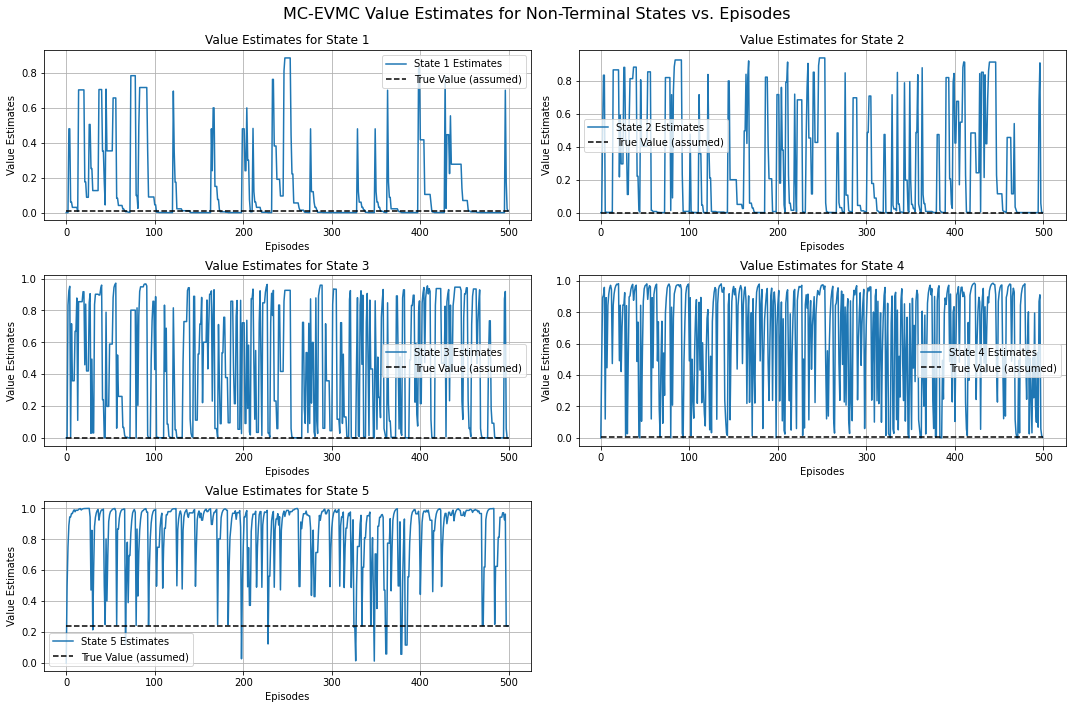

In [16]:
numEpisodes = 500
# part with constant alpha
initialValue = 0.5
finalValue = 0.5
maxSteps = 100
gamma = 0.99
decayType = "linear"
mctype = "EVMC"
global_seed = 123

state_values = MonteCarloPrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, mctype, global_seed)

plt.figure(figsize=(15, 10))

for state in range(1, 6):  # Loop through non-terminal states
    plt.subplot(3, 2, state)
    values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]
    plt.plot(values_per_state, label=f'State {state} Estimates')
    plt.plot([0, numEpisodes], [state_values[numEpisodes - 1][state], state_values[numEpisodes - 1][state]], 'k--', label="True Value (assumed)")
    plt.xlabel('Episodes')
    plt.ylabel('Value Estimates')
    plt.title(f'Value Estimates for State {state}')
    plt.legend()
    plt.grid()
    plt.tight_layout()

plt.suptitle('MC-EVMC Value Estimates for Non-Terminal States vs. Episodes', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()


# Decaying Alpha EVMC

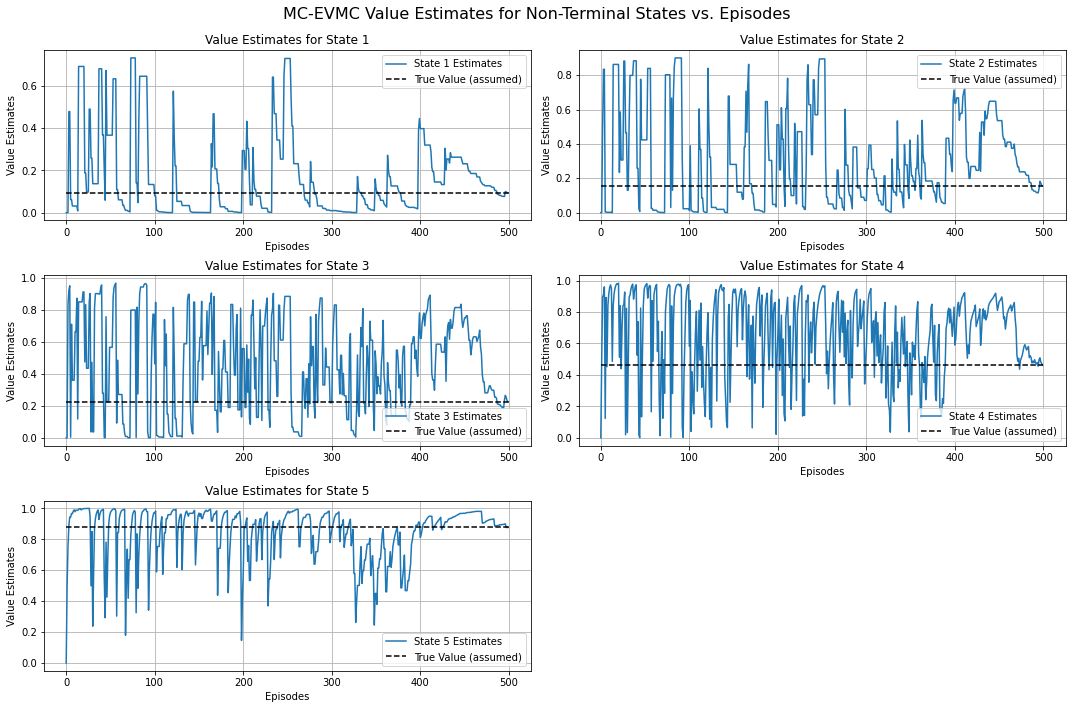

In [17]:
# part with decaying alpha
numEpisodes = 500
# part with constant alpha
initialValue = 0.5
finalValue = 0.01
maxSteps = 100
gamma = 0.99
decayType = "linear"
mctype = "EVMC"
global_seed = 123

# Implementing a function for deacaying the step parameter for half episodes and using const value afterwards
def decayAlpha_modified(initialValue, finalValue, maxSteps, decayType):

  # stpring the step params in a list
  alphas = []

  decay_rate = (np.log(finalValue/initialValue)) / maxSteps
  for curr_step in range(maxSteps//2):
    curr_alpha = initialValue * np.exp(decay_rate * curr_step)
    alphas.append(curr_alpha)
  for i in range(maxSteps//2, maxSteps):
    alphas.append(curr_alpha)

  return alphas

state_values = MonteCarloPrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, mctype, global_seed)

plt.figure(figsize=(15, 10))

for state in range(1, 6):  # Loop through non-terminal states
    plt.subplot(3, 2, state)
    values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]
    plt.plot(values_per_state, label=f'State {state} Estimates')
    plt.plot([0, numEpisodes], [state_values[numEpisodes - 1][state], state_values[numEpisodes - 1][state]], 'k--', label="True Value (assumed)")
    plt.xlabel('Episodes')
    plt.ylabel('Value Estimates')
    plt.title(f'Value Estimates for State {state}')
    plt.legend()
    plt.grid()
    plt.tight_layout()

plt.suptitle('MC-EVMC Value Estimates for Non-Terminal States vs. Episodes', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

# Part 7: Constant Alpha TD Estimates

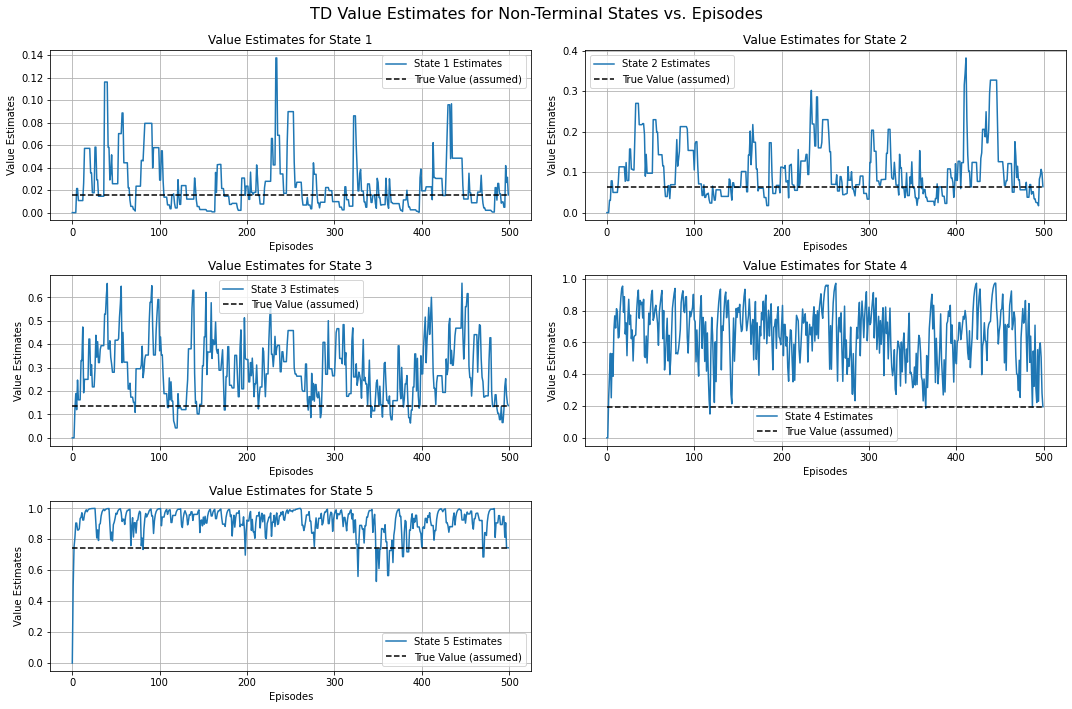

In [18]:
numEpisodes = 500
# part with constant alpha
initialValue = 0.5
finalValue = 0.5
maxSteps = 100
gamma = 0.99
decayType = "linear"
global_seed = 123

state_values = TemporalDifferencePrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, global_seed)

plt.figure(figsize=(15, 10))

for state in range(1, 6):  # Loop through non-terminal states
    plt.subplot(3, 2, state)
    values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]
    plt.plot(values_per_state, label=f'State {state} Estimates')
    plt.plot([0, numEpisodes], [state_values[numEpisodes - 1][state], state_values[numEpisodes - 1][state]], 'k--', label="True Value (assumed)")
    plt.xlabel('Episodes')
    plt.ylabel('Value Estimates')
    plt.title(f'Value Estimates for State {state}')
    plt.legend()
    plt.grid()
    plt.tight_layout()

plt.suptitle('TD Value Estimates for Non-Terminal States vs. Episodes', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()


# Decaying Alpha TD Estimates

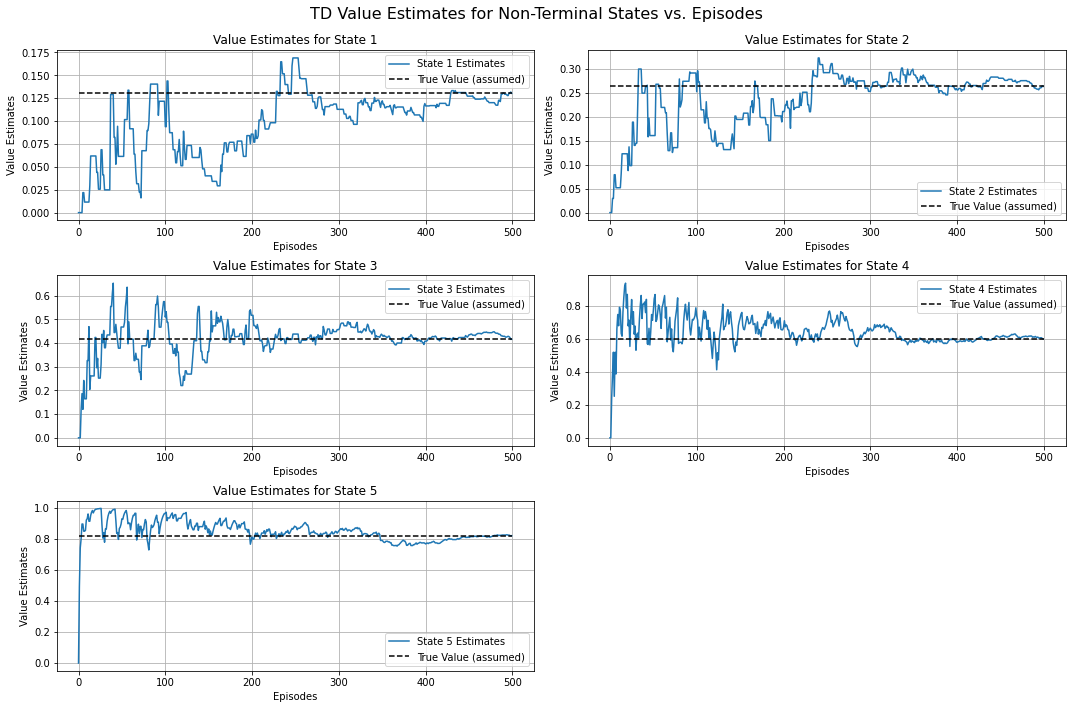

In [19]:
# part with decaying alpha
numEpisodes = 500
# part with constant alpha
initialValue = 0.5
finalValue = 0.01
maxSteps = 100
gamma = 0.99
decayType = "exponential"
global_seed = 123

# Implementing a function for deacaying the step parameter for half episodes and using const value afterwards
def decayAlpha_modified(initialValue, finalValue, maxSteps, decayType):

  # stpring the step params in a list
  alphas = []

  decay_rate = (np.log(finalValue/initialValue)) / maxSteps
  for curr_step in range(maxSteps//2):
    curr_alpha = initialValue * np.exp(decay_rate * curr_step)
    alphas.append(curr_alpha)
  for i in range(maxSteps//2, maxSteps):
    alphas.append(curr_alpha)

  return alphas

state_values = TemporalDifferencePrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, global_seed)

plt.figure(figsize=(15, 10))

for state in range(1, 6):  # Loop through non-terminal states
    plt.subplot(3, 2, state)
    values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]
    plt.plot(values_per_state, label=f'State {state} Estimates')
    plt.plot([0, numEpisodes], [state_values[numEpisodes - 1][state], state_values[numEpisodes - 1][state]], 'k--', label="True Value (assumed)")
    plt.xlabel('Episodes')
    plt.ylabel('Value Estimates')
    plt.title(f'Value Estimates for State {state}')
    plt.legend()
    plt.grid()
    plt.tight_layout()

plt.suptitle('TD Value Estimates for Non-Terminal States vs. Episodes', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

# Part 8: Averaged out FVMC

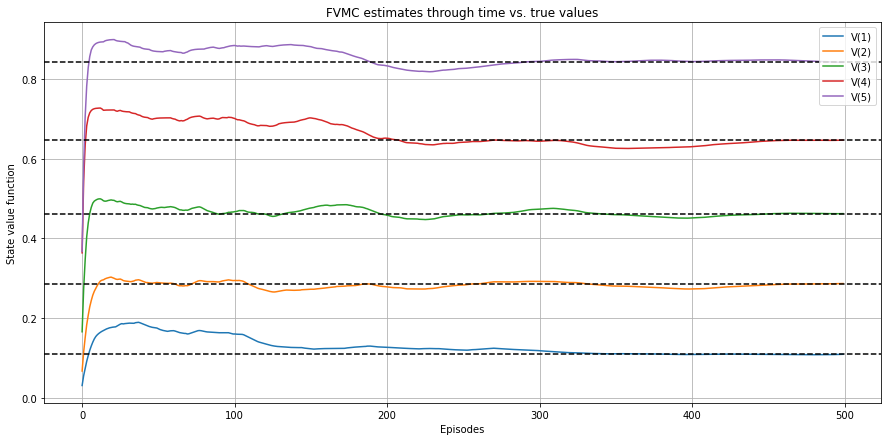

In [20]:
seeds = list(np.arange(100, 300))
numEpisodes = 500
initialValue = 0.5
finalValue = 0.01
maxSteps = 100
gamma = 0.99
decayType = "exponential"
mctype = "FVMC"

cumulative_state_values = {s : [0]*numEpisodes for s in range(1, 6)}
true_values = [0]*5
# iterating through various seeds (FVMC)
for seed in seeds:
  global_seed = int(seed)
  state_values = MonteCarloPrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, mctype, global_seed)
  true_values = list(map(add, true_values, state_values[numEpisodes - 1][1:6]))
  for state in range(1, 6):
    values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

    # taking the cumulative sum for each state over different seeds
    cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(1, 6):  # Loop through non-terminal states
    plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xlabel('Episodes')
plt.ylabel('State value function')
plt.title('FVMC estimates through time vs. true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

# Averaged out EVMC

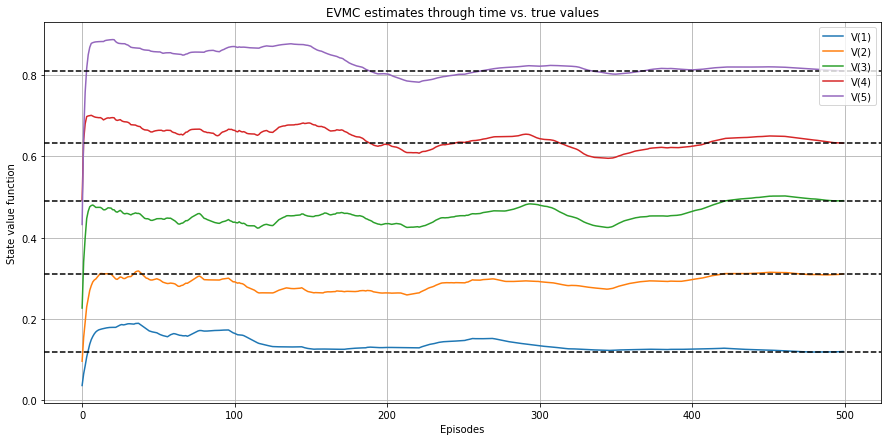

In [21]:
seeds = list(np.arange(100, 300))
numEpisodes = 500
initialValue = 0.5
finalValue = 0.01
maxSteps = 100
gamma = 0.99
decayType = "exponential"
mctype = "EVMC"

cumulative_state_values = {s : [0]*numEpisodes for s in range(1, 6)}
true_values = [0]*5
# iterating through various seeds (EVMC)
for seed in seeds:
  global_seed = int(seed)
  state_values = MonteCarloPrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, mctype, global_seed)
  true_values = list(map(add, true_values, state_values[numEpisodes - 1][1:6]))
  for state in range(1, 6):
    values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

    # taking the cumulative sum for each state over different seeds
    cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(1, 6):  # Loop through non-terminal states
    plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xlabel('Episodes')
plt.ylabel('State value function')
plt.title('EVMC estimates through time vs. true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

# Averaged out TD Estimates

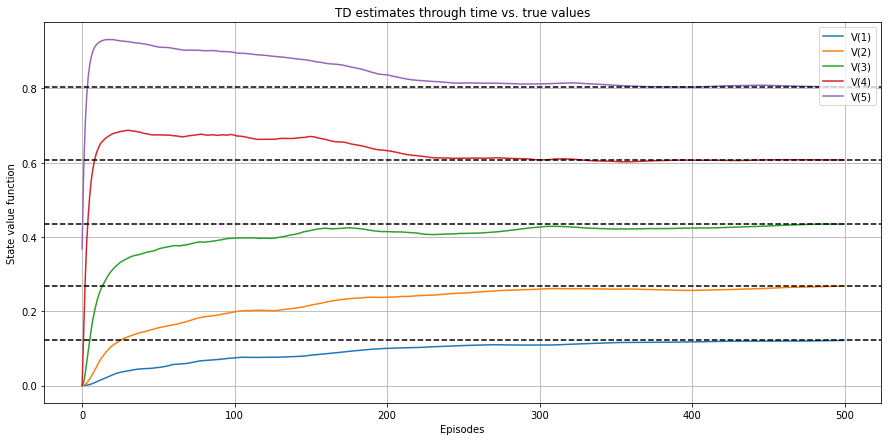

In [22]:
seeds = list(np.arange(100, 300))
numEpisodes = 500
initialValue = 0.5
finalValue = 0.01
maxSteps = 100
gamma = 0.99
decayType = "exponential"

cumulative_state_values = {s : [0]*numEpisodes for s in range(1, 6)}
true_values = [0]*5
# iterating through various seeds (TD)
for seed in seeds:
  global_seed = int(seed)
  state_values = TemporalDifferencePrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, global_seed)
  true_values = list(map(add, true_values, state_values[numEpisodes - 1][1:6]))
  for state in range(1, 6):
    values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

    # taking the cumulative sum for each state over different seeds
    cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(1, 6):  # Loop through non-terminal states
    plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xlabel('Episodes')
plt.ylabel('State value function')
plt.title('TD estimates through time vs. true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

# Part 9: Constant Alpha FVMC (log scale Episodes)

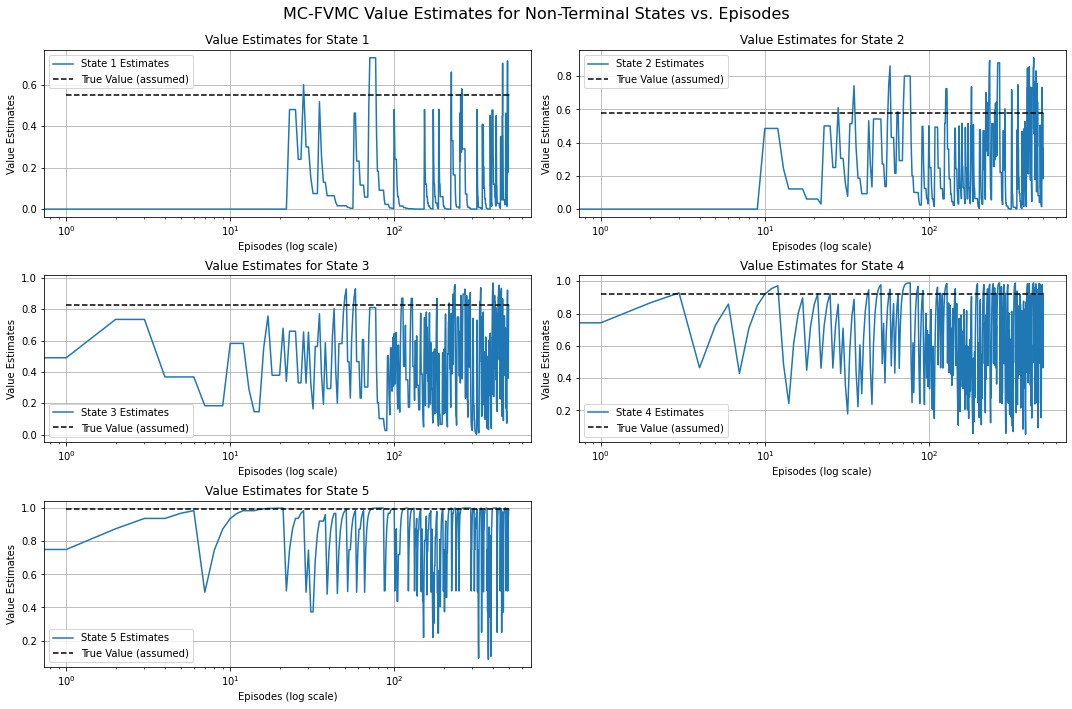

In [23]:
numEpisodes = 500
# part with constant alpha
initialValue = 0.5
finalValue = 0.5
maxSteps = 100
gamma = 0.99
decayType = "linear"
mctype = "FVMC"
global_seed

state_values = MonteCarloPrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, mctype, global_seed)


plt.figure(figsize=(15, 10))

for state in range(1, 6):  # Loop through non-terminal states
    plt.subplot(3, 2, state)
    values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]
    plt.plot(range(numEpisodes), values_per_state, label=f'State {state} Estimates')
    plt.plot([1, numEpisodes], [state_values[numEpisodes - 1][state], state_values[numEpisodes - 1][state]], 'k--', label="True Value (assumed)")
    plt.xscale('log')  # Set the x-axis to a logarithmic scale
    plt.xlabel('Episodes (log scale)')
    plt.ylabel('Value Estimates')
    plt.title(f'Value Estimates for State {state}')
    plt.legend()
    plt.grid()
    plt.tight_layout()

plt.suptitle('MC-FVMC Value Estimates for Non-Terminal States vs. Episodes', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()


# Decaying Alpha FVMC (log Scale Episodes)

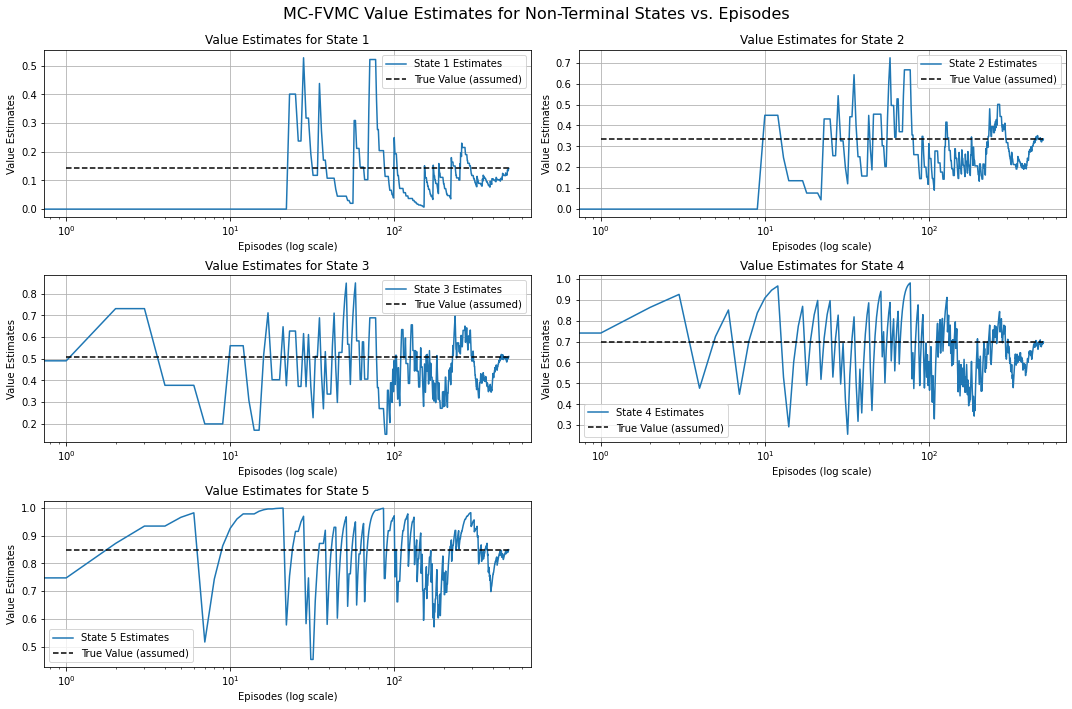

In [24]:
# part with decaying alpha
numEpisodes = 500
# part with constant alpha
initialValue = 0.5
finalValue = 0.01
maxSteps = 100
gamma = 0.99
decayType = "exponential"
mctype = "FVMC"
global_seed

# Implementing a function for deacaying the step parameter for half episodes and using const value afterwards
def decayAlpha_modified(initialValue, finalValue, maxSteps, decayType):

  # stpring the step params in a list
  alphas = []

  decay_rate = (np.log(finalValue/initialValue)) / maxSteps
  for curr_step in range(maxSteps//2):
    curr_alpha = initialValue * np.exp(decay_rate * curr_step)
    alphas.append(curr_alpha)
  for i in range(maxSteps//2, maxSteps):
    alphas.append(curr_alpha)

  return alphas

state_values = MonteCarloPrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, mctype, global_seed)

plt.figure(figsize=(15, 10))

for state in range(1, 6):  # Loop through non-terminal states
    plt.subplot(3, 2, state)
    values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]
    plt.plot(range(numEpisodes), values_per_state, label=f'State {state} Estimates')
    plt.plot([1, numEpisodes], [state_values[numEpisodes - 1][state], state_values[numEpisodes - 1][state]], 'k--', label="True Value (assumed)")
    plt.xscale('log')  # Set the x-axis to a logarithmic scale
    plt.xlabel('Episodes (log scale)')
    plt.ylabel('Value Estimates')
    plt.title(f'Value Estimates for State {state}')
    plt.legend()
    plt.grid()
    plt.tight_layout()

plt.suptitle('MC-FVMC Value Estimates for Non-Terminal States vs. Episodes', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

# Part 10: Constant Alpha EVMC (log Scale Episodes)

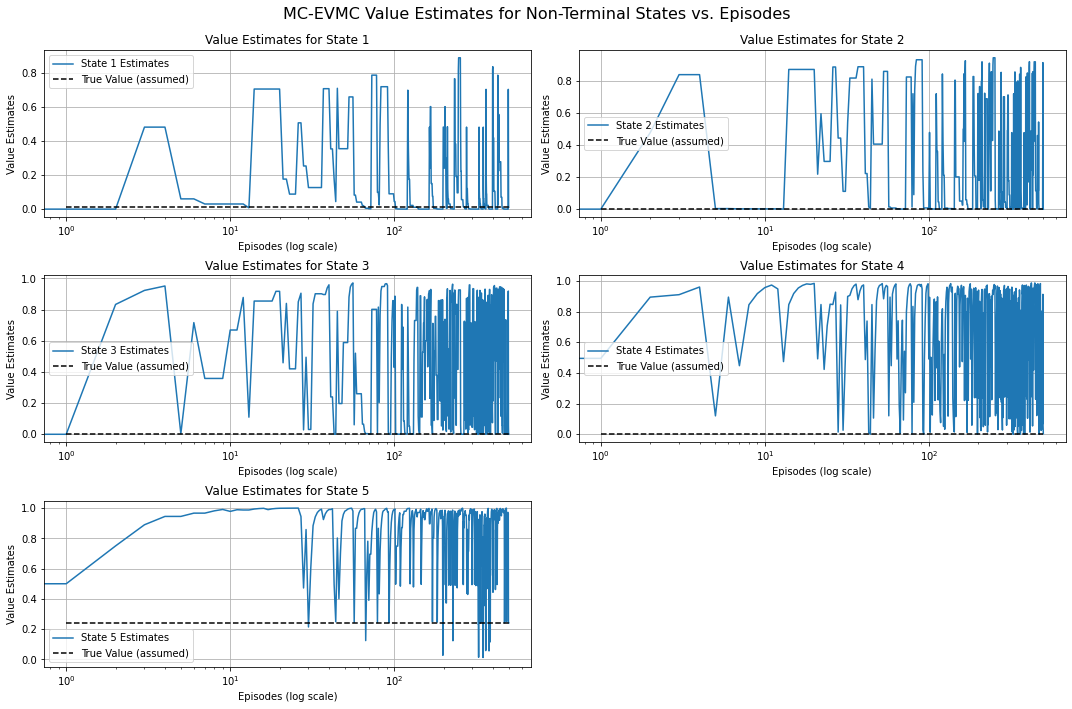

In [25]:
numEpisodes = 500
# part with constant alpha
initialValue = 0.5
finalValue = 0.5
maxSteps = 100
gamma = 0.99
decayType = "linear"
mctype = "EVMC"
global_seed = 123

state_values = MonteCarloPrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, mctype, global_seed)


plt.figure(figsize=(15, 10))

for state in range(1, 6):  # Loop through non-terminal states
    plt.subplot(3, 2, state)
    values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]
    plt.plot(range(numEpisodes), values_per_state, label=f'State {state} Estimates')
    plt.plot([1, numEpisodes], [state_values[numEpisodes - 1][state], state_values[numEpisodes - 1][state]], 'k--', label="True Value (assumed)")
    plt.xscale('log')  # Set the x-axis to a logarithmic scale
    plt.xlabel('Episodes (log scale)')
    plt.ylabel('Value Estimates')
    plt.title(f'Value Estimates for State {state}')
    plt.legend()
    plt.grid()
    plt.tight_layout()

plt.suptitle('MC-EVMC Value Estimates for Non-Terminal States vs. Episodes', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()


# Decaying Alpha EVMC (log Scale Episodes)

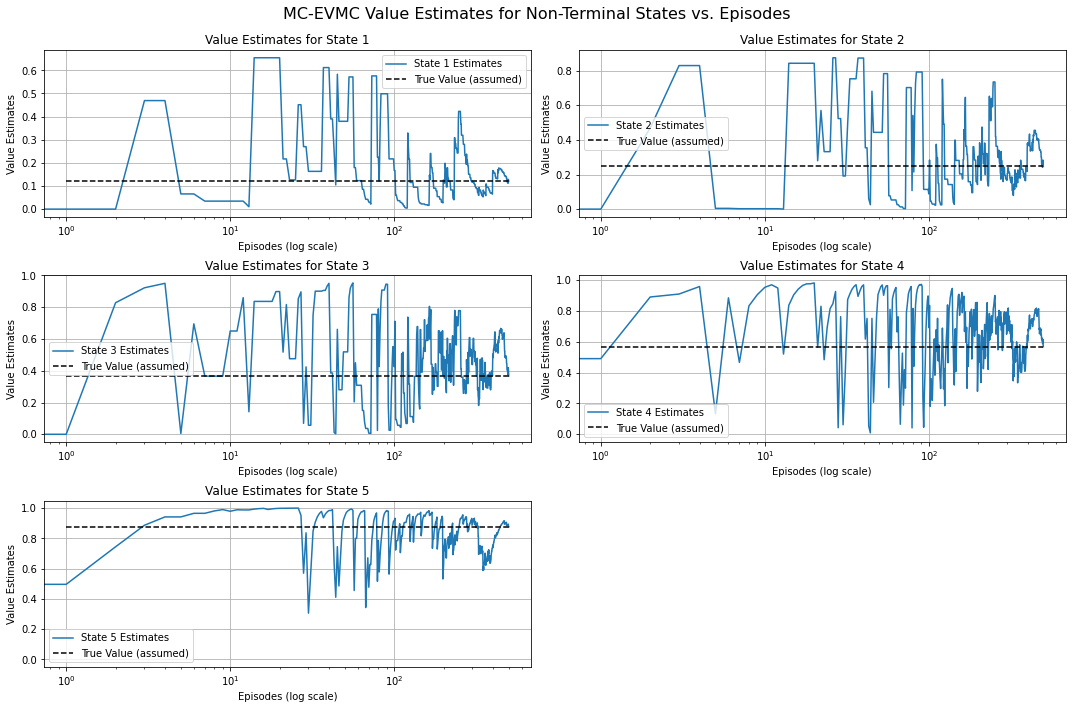

In [26]:
# part with decaying alpha
numEpisodes = 500
# part with constant alpha
initialValue = 0.5
finalValue = 0.01
maxSteps = 100
gamma = 0.99
decayType = "exponential"
mctype = "EVMC"
global_seed = 123

# Implementing a function for deacaying the step parameter for half episodes and using const value afterwards
def decayAlpha_modified(initialValue, finalValue, maxSteps, decayType):

  # stpring the step params in a list
  alphas = []

  decay_rate = (np.log(finalValue/initialValue)) / maxSteps
  for curr_step in range(maxSteps//2):
    curr_alpha = initialValue * np.exp(decay_rate * curr_step)
    alphas.append(curr_alpha)
  for i in range(maxSteps//2, maxSteps):
    alphas.append(curr_alpha)

  return alphas

state_values = MonteCarloPrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, mctype, global_seed)

plt.figure(figsize=(15, 10))

for state in range(1, 6):  # Loop through non-terminal states
    plt.subplot(3, 2, state)
    values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]
    plt.plot(range(numEpisodes), values_per_state, label=f'State {state} Estimates')
    plt.plot([1, numEpisodes], [state_values[numEpisodes - 1][state], state_values[numEpisodes - 1][state]], 'k--', label="True Value (assumed)")
    plt.xscale('log')  # Set the x-axis to a logarithmic scale
    plt.xlabel('Episodes (log scale)')
    plt.ylabel('Value Estimates')
    plt.title(f'Value Estimates for State {state}')
    plt.legend()
    plt.grid()
    plt.tight_layout()

plt.suptitle('MC-EVMC Value Estimates for Non-Terminal States vs. Episodes', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

# Part 11: Constant Alpha TD Estimates (log Scale Episodes)

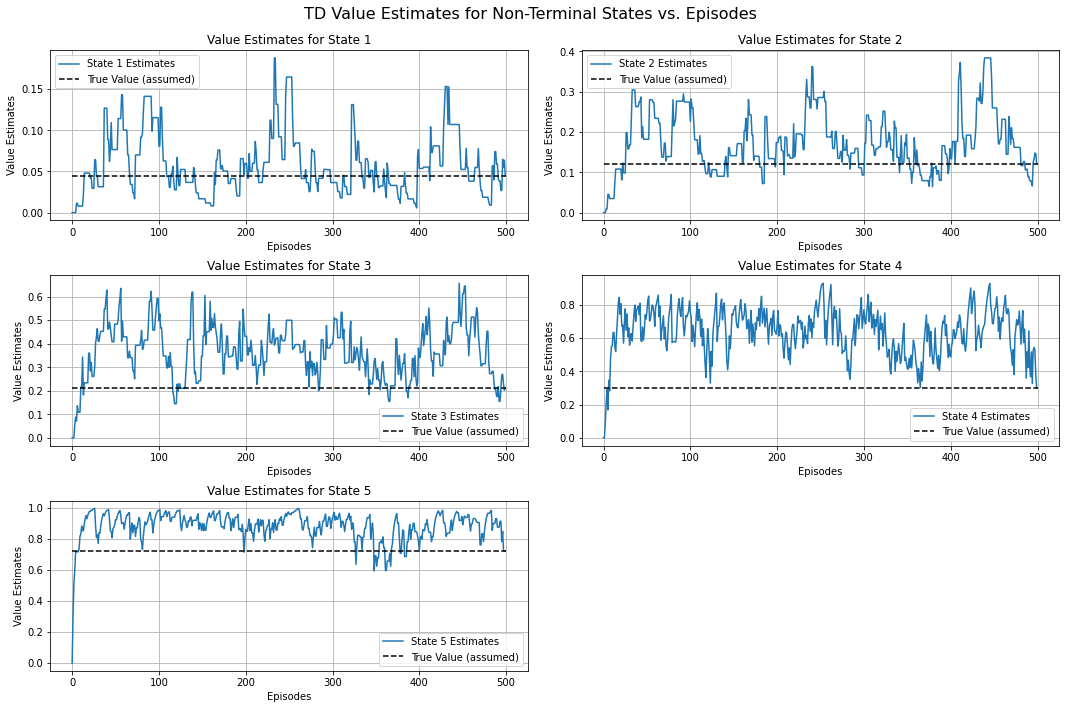

In [27]:
numEpisodes = 500
# part with constant alpha
initialValue = 0.3
finalValue = 0.3
maxSteps = 100
gamma = 0.99
decayType = "linear"
global_seed = 123

state_values = TemporalDifferencePrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, global_seed)

plt.figure(figsize=(15, 10))

for state in range(1, 6):  # Loop through non-terminal states
    plt.subplot(3, 2, state)
    values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]
    plt.plot(values_per_state, label=f'State {state} Estimates')
    plt.plot([0, numEpisodes], [state_values[numEpisodes - 1][state], state_values[numEpisodes - 1][state]], 'k--', label="True Value (assumed)")
    plt.xlabel('Episodes')
    plt.ylabel('Value Estimates')
    plt.title(f'Value Estimates for State {state}')
    plt.legend()
    plt.grid()
    plt.tight_layout()

plt.suptitle('TD Value Estimates for Non-Terminal States vs. Episodes', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()


# Decaying Alpha TD Estimates (log Scale Episodes)

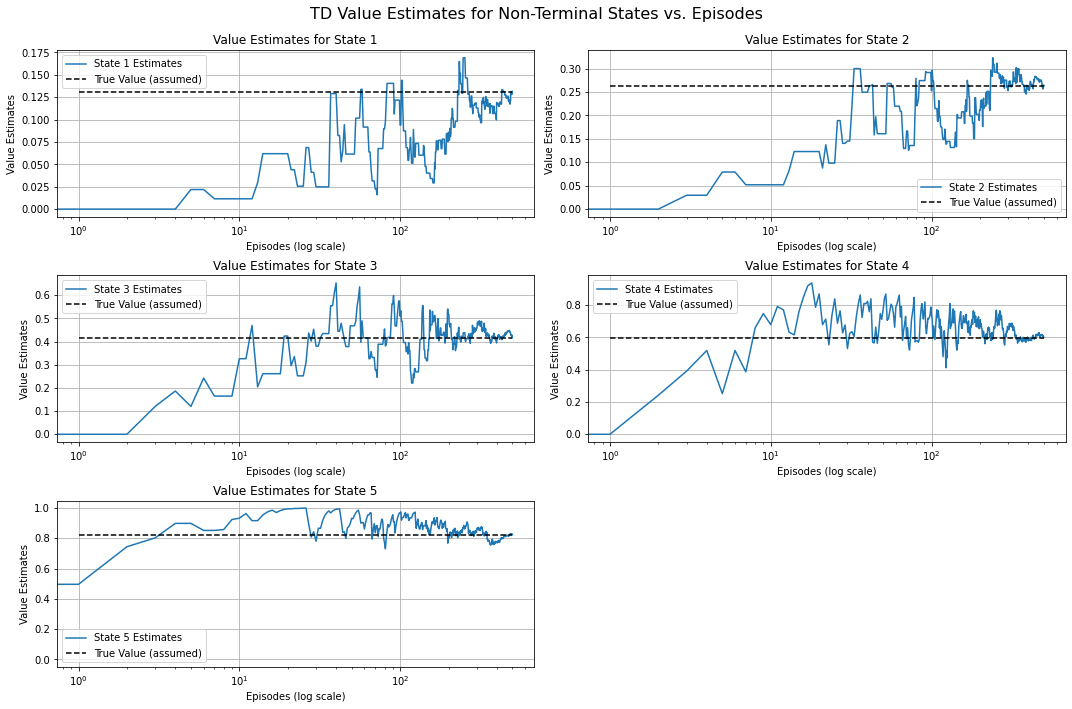

In [28]:
# part with decaying alpha
numEpisodes = 500
# part with constant alpha
initialValue = 0.5
finalValue = 0.01
maxSteps = 100
gamma = 0.99
decayType = "exponential"
global_seed = 123

# Implementing a function for deacaying the step parameter for half episodes and using const value afterwards
def decayAlpha_modified(initialValue, finalValue, maxSteps, decayType):

  # stpring the step params in a list
  alphas = []

  decay_rate = (np.log(finalValue/initialValue)) / maxSteps
  for curr_step in range(maxSteps//2):
    curr_alpha = initialValue * np.exp(decay_rate * curr_step)
    alphas.append(curr_alpha)
  for i in range(maxSteps//2, maxSteps):
    alphas.append(curr_alpha)

  return alphas

state_values = TemporalDifferencePrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, global_seed)

plt.figure(figsize=(15, 10))

for state in range(1, 6):  # Loop through non-terminal states
    plt.subplot(3, 2, state)
    values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]
    plt.plot(range(numEpisodes), values_per_state, label=f'State {state} Estimates')
    plt.plot([1, numEpisodes], [state_values[numEpisodes - 1][state], state_values[numEpisodes - 1][state]], 'k--', label="True Value (assumed)")
    plt.xscale('log')  # Set the x-axis to a logarithmic scale
    plt.xlabel('Episodes (log scale)')
    plt.ylabel('Value Estimates')
    plt.title(f'Value Estimates for State {state}')
    plt.legend()
    plt.grid()
    plt.tight_layout()

plt.suptitle('TD Value Estimates for Non-Terminal States vs. Episodes', fontsize=16)
plt.subplots_adjust(top=0.92)
plt.show()

# Averaged out FVMC Estimates (log Scale Episodes)

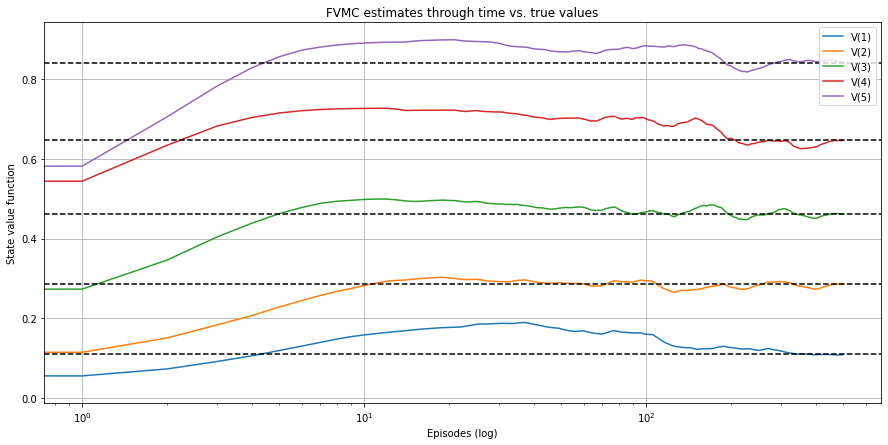

In [29]:
seeds = list(np.arange(100, 300))
numEpisodes = 500
initialValue = 0.5
finalValue = 0.01
maxSteps = 100
gamma = 0.99
decayType = "exponential"
mctype = "FVMC"

cumulative_state_values = {s : [0]*numEpisodes for s in range(1, 6)}
true_values = [0]*5
# iterating through various seeds (FVMC)
for seed in seeds:
  global_seed = int(seed)
  state_values = MonteCarloPrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, mctype, global_seed)
  true_values = list(map(add, true_values, state_values[numEpisodes - 1][1:6]))
  for state in range(1, 6):
    values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

    # taking the cumulative sum for each state over different seeds
    cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(1, 6):  # Loop through non-terminal states
    plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xscale("log")
plt.xlabel('Episodes (log)')
plt.ylabel('State value function')
plt.title('FVMC estimates through time vs. true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

# Averaged out EVMC Estimates (log Scale Episodes)

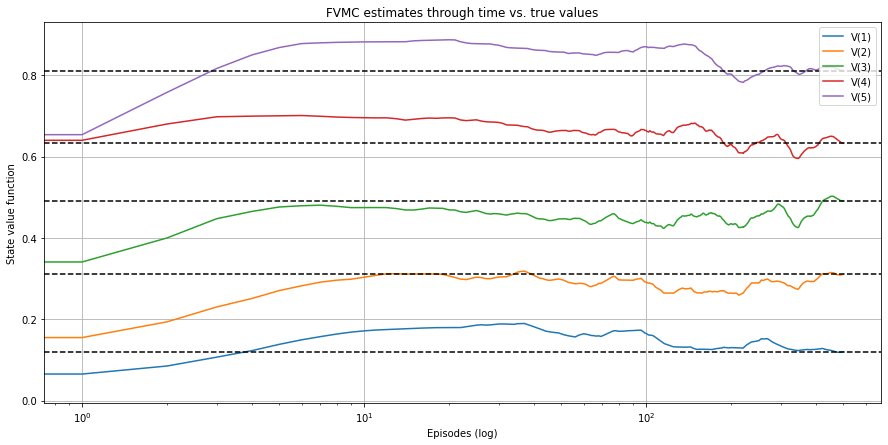

In [30]:
seeds = list(np.arange(100, 300))
numEpisodes = 500
initialValue = 0.5
finalValue = 0.01
maxSteps = 100
gamma = 0.99
decayType = "exponential"
mctype = "EVMC"


cumulative_state_values = {s : [0]*numEpisodes for s in range(1, 6)}
true_values = [0]*5
# iterating through various seeds (FVMC)
for seed in seeds:
  global_seed = int(seed)
  state_values = MonteCarloPrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, mctype, global_seed)
  true_values = list(map(add, true_values, state_values[numEpisodes - 1][1:6]))
  for state in range(1, 6):
    values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

    # taking the cumulative sum for each state over different seeds
    cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(1, 6):  # Loop through non-terminal states
    plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xscale("log")
plt.xlabel('Episodes (log)')
plt.ylabel('State value function')
plt.title('FVMC estimates through time vs. true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

# Averaged out TD Estimates (log Scale Episodes)

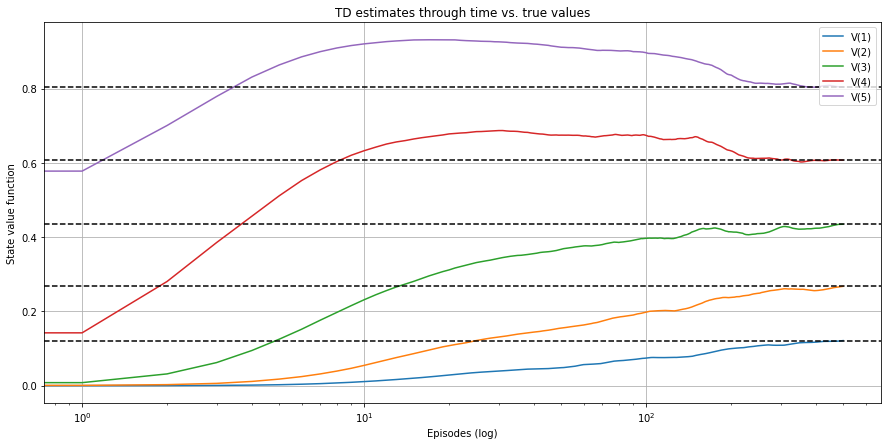

In [31]:
seeds = list(np.arange(100, 300))
numEpisodes = 500
initialValue = 0.5
finalValue = 0.01
maxSteps = 100
gamma = 0.99
decayType = "exponential"

cumulative_state_values = {s : [0]*numEpisodes for s in range(1, 6)}
true_values = [0]*5
# iterating through various seeds (TD)
for seed in seeds:
  global_seed = int(seed)
  state_values = TemporalDifferencePrediction(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, global_seed)
  true_values = list(map(add, true_values, state_values[numEpisodes - 1][1:6]))
  for state in range(1, 6):
    values_per_state = [state_values[episode][state] for episode in range(numEpisodes)]

    # taking the cumulative sum for each state over different seeds
    cumulative_state_values[state] = list(map(add, cumulative_state_values[state], values_per_state))

avg_state_values = {state: [value / len(seeds) for value in values] for state, values in cumulative_state_values.items()}
true_values = [value / len(seeds) for value in true_values]

plt.figure(figsize=(15, 7))

# Plot the estimated values for each state
for state in range(1, 6):  # Loop through non-terminal states
    plt.plot(avg_state_values[state], label=f'V({state})')

# Plot the true values for each state as horizontal lines
for state, true_value in enumerate(true_values, start=1):
    plt.axhline(y=true_value, color='k', linestyle='--')

plt.xscale("log")
plt.xlabel('Episodes (log)')
plt.ylabel('State value function')
plt.title('TD estimates through time vs. true values')
plt.legend(loc = "upper right")
plt.grid()
plt.show()

# Part 13: Target Score plots for State 4 (FVMC Setting) for decaying α

In [32]:
seeds = list(np.arange(100, 300))
numEpisodes = 500
initialValue = 0.5
finalValue = 0.01
maxSteps = 100
gamma = 0.99
decayType = "exponential"
global_seed = 123

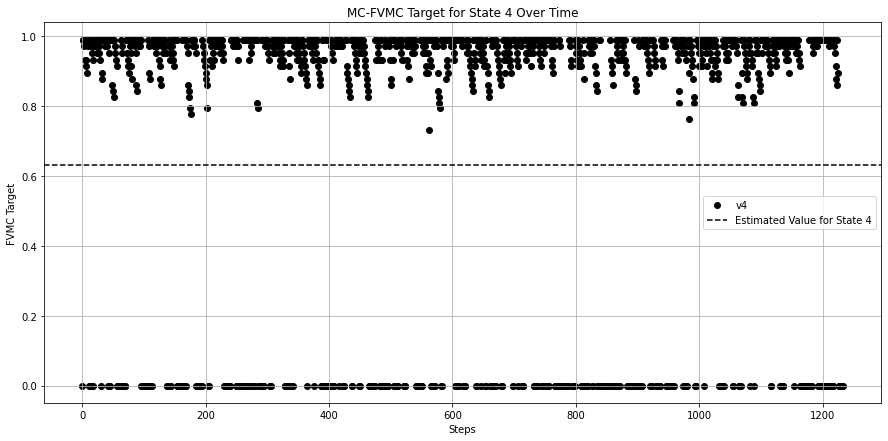

In [33]:
# Implementing the Monte Carlo prediction (FVMC) for extraction of target score
def MonteCarloPrediction_modified(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, mctype, global_seed):
    values = np.zeros(env.observation_space.n)
    values_eps = []
    returns = {s: [] for s in range(env.observation_space.n)}
    alphas = decayAlpha(initialValue, finalValue, numEpisodes, decayType)
    # List to store the returns (G) for a specific state
    state_returns = []

    for episode in range(numEpisodes):
        episode_seed = global_seed + episode
        trajectory = generateTrajectory(env, policy, maxSteps, seed = episode_seed)
        if not trajectory:
            continue
        G = 0
        visited_states = set()

        for traj_idx in range(len(trajectory)-1, -1, -1):
            state, action, reward, next_state, done = trajectory[traj_idx]
            G = gamma * G + reward

            if mctype == "FVMC" and state not in visited_states:
                values[state] += alphas[episode] * (G - values[state])
                visited_states.add(state)
            elif mctype == "EVMC":
                values[state] += alphas[episode] * (G - values[state])
            # If this state is the specific state we are interested in, record the return
            if state == specific_state:
                state_returns.append(G)

        values_eps.append(np.copy(values))

    return values_eps, state_returns

# obtaining target score for state 4
specific_state = 4

values_eps, td_targets = MonteCarloPrediction_modified(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, "FVMC", global_seed)


plt.figure(figsize = (15, 7))
# Plot the TD-targets for the specific state
plt.scatter(range(len(td_targets)), td_targets, color = "black", label = "v{}".format(specific_state))
plt.axhline(y=values_eps[numEpisodes - 1][specific_state], color='k', linestyle='--',label=f"Estimated Value for State {specific_state}")
plt.xlabel('Steps')
plt.ylabel('FVMC Target')
plt.title(f'MC-FVMC Target for State {specific_state} Over Time')
plt.grid()
plt.legend()
plt.show()


# Part 14: Target Score plots for State 4 (EVMC Setting) for decaying α

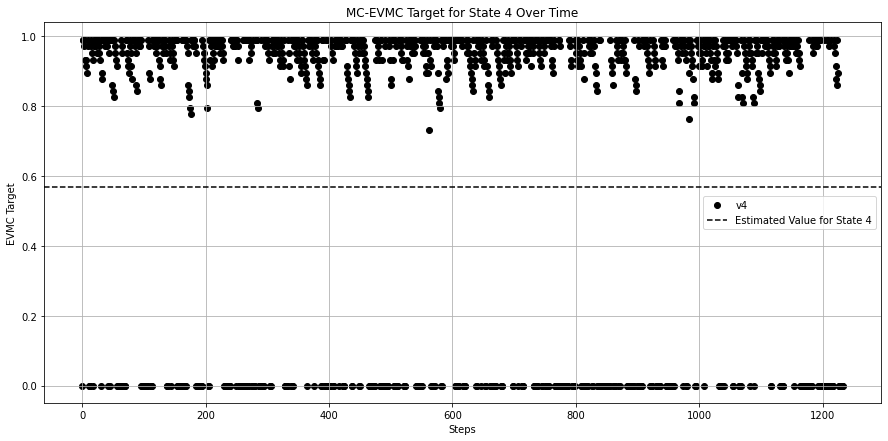

In [34]:
# obtaining target score for state 4
specific_state = 4
values_eps, td_targets = MonteCarloPrediction_modified(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, "EVMC", global_seed)

plt.figure(figsize = (15, 7))
# Plot the TD-targets for the specific state
plt.scatter(range(len(td_targets)), td_targets, color = "black", label = "v{}".format(specific_state))
plt.axhline(y=values_eps[numEpisodes - 1][specific_state], color='k', linestyle='--',label=f"Estimated Value for State {specific_state}")
plt.xlabel('Steps')
plt.ylabel('EVMC Target')
plt.title(f'MC-EVMC Target for State {specific_state} Over Time')
plt.grid()
plt.legend()
plt.show()

# Part 15: Target Score plots for State 4 (TD Setting) for decaying α

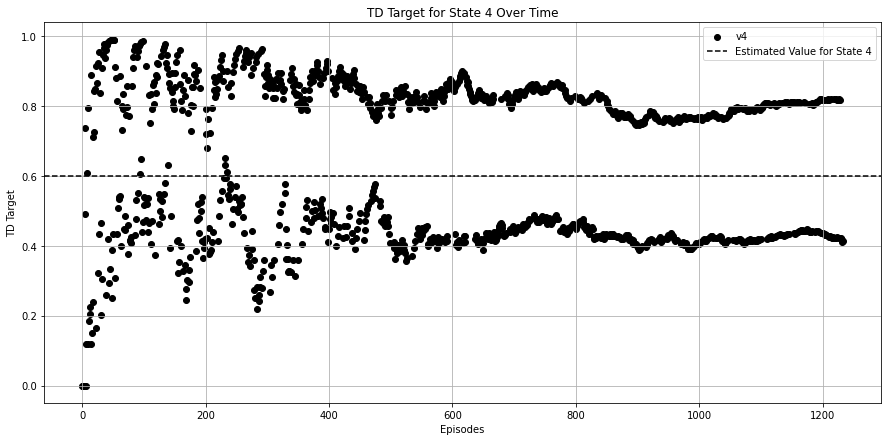

In [35]:
# Implementing the temporal difference for target score extraction
def TemporalDifferencePrediction_modified(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, specific_state, global_seed):
    # Initialize the values with zeros
    values = np.zeros(env.observation_space.n)
    alphas = decayAlpha(initialValue, finalValue, numEpisodes, decayType)
    values_eps = []
    targets = []  # List to store the TD-targets for the specific state

    for episode in range(numEpisodes):
        episode_seed = global_seed + episode
        state = env.reset(seed = episode_seed)
        for step in range(maxSteps):
            action = policy[state]
            next_state, reward, done, _ = env.step(action)
            td_target = reward + gamma * values[next_state] if not done else reward

            if state == specific_state:
                targets.append(td_target)  # Track the TD targets for the specific state

            td_error = td_target - values[state]
            values[state] += alphas[episode] * td_error
            if done:
                break
            state = next_state

        values_eps.append(np.copy(values))

    return values_eps, targets

# Set the specific state you want to track
specific_state = 4
values_eps, td_targets = TemporalDifferencePrediction_modified(env, policy, initialValue, finalValue, maxSteps, numEpisodes, gamma, decayType, specific_state, global_seed)
plt.figure(figsize = (15, 7))
# Plot the TD-targets for the specific state
plt.scatter(range(len(td_targets)), td_targets, color="black", label=f"v{specific_state}")
plt.axhline(y=values_eps[-1][specific_state], color='k', linestyle='--', label=f"Estimated Value for State {specific_state}")
plt.xlabel('Episodes')
plt.ylabel('TD Target')
plt.title(f'TD Target for State {specific_state} Over Time')
plt.grid()
plt.legend()
plt.show()
